In [2]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from numpy import random

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

C:\Users\barbi\AppData\Local\Temp\ipykernel_4760\4040705355.py:14: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


In [3]:
def depolarizing_channel(q, p, system, ancillae):
    """Returns a QuantumCircuit implementing depolarizing channel on q[system]
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        p (float): the probability for the channel between 0 and 1
        system (int): index of the system qubit
        ancillae (list): list of indices for the ancillary qubits
        
    Returns:
        A QuantumCircuit object
    """
    z = QuantumCircuit(q)
    
    theta = 0.5*np.arccos(1-(2*p))
    
    t1 = np.pi/4
    t2 = np.pi/4
    
    z.ry(theta, q[ancillae[0]])
    z.ry(theta, q[ancillae[1]])
    z.ry(theta, q[ancillae[2]])
    
    z.ry(t1, q[system])
    z.rz(t2, q[system])
    
    z.cx(q[ancillae[0]], q[system])
    z.cy(q[ancillae[1]], q[system])
    z.cz(q[ancillae[2]], q[system])
    
    return z

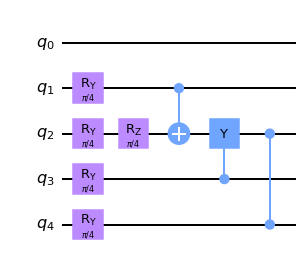

In [4]:
q = QuantumRegister(5,name = 'q')
p = 0.5
system = 2
ancillae = [1,3,4]
circuit = depolarizing_channel(q, p, system, ancillae)
circuit.draw(output='mpl')

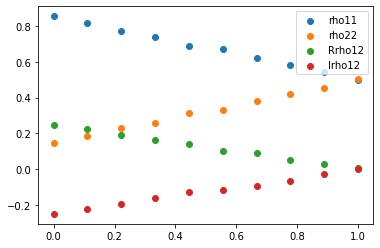

In [13]:
p = np.linspace(0,1.0,10)
q = QuantumRegister(5,name = 'q')
system = 2
ancillae = [1,3,4]
rho11, rho22, Rrho12, Irho12 = [], [], [], []
for i in p:
    circuit = depolarizing_channel(q, i, system, ancillae)
    qst_bell = state_tomography_circuits(circuit, q[system])
    job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)
    tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)
    rho = tomo_fitter_bell.fit(method='lstsq')
    rho11.append(rho[0,0])
    rho22.append(rho[1,1])
    Rrho12.append(np.real(rho[0,1]))
    Irho12.append(np.imag(rho[0,1]))

plt.scatter(p, rho11, label="rho11")
plt.scatter(p, rho22, label="rho22")
plt.scatter(p, Rrho12, label="Rrho12")
plt.scatter(p, Irho12, label="Irho12")
plt.legend()
plt.show()